## Feature Extraction and Price Prediction for Mobile Phones

### Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

### Data Exploration

In [2]:
# Load the dataset

df = pd.read_excel("Processed_Flipdata.xlsx")

In [3]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [4]:
# Display Basic information about the dataset

info = df.info()
head = df.head()
tail = df.tail()
shape = df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [5]:
head

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [6]:
tail

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,15999


In [7]:
shape

(541, 12)

The dataset contains 541 entries and 12 columns

In [8]:
# Columns present in the dataset

columns = df.columns

In [9]:
columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

Here are the columns present in the dataset

In [10]:
# Check for missing values

missing_values = df.isnull().sum()

In [11]:
missing_values

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

There are no missing values in any of the columns

In [12]:
# Value counts distributions -->

# Distribution of Memory

memory_dist = df['Memory'].value_counts()

# Distribution of RAM

RAM_dist = df['RAM'].value_counts()

# Distribution of Prize

prize_dist = df['Prize'].value_counts()


In [13]:
memory_dist

128    259
64     169
256     55
32      52
16       6
Name: Memory, dtype: int64

In [14]:
RAM_dist

4    186
8    157
6    121
3     40
2     37
Name: RAM, dtype: int64

In [15]:
prize_dist

15999    23
9999     22
16999    21
8999     20
23999    19
         ..
20998     1
29499     1
8495      1
8449      1
38999     1
Name: Prize, Length: 158, dtype: int64

In [16]:
# Summary statistics for numerical columns

summary_stats = df.describe()

In [17]:
summary_stats

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


Observations :-

The dataset is well rounded in terms of Memory and RAM options, Covering a wide range of smartphones and models.
The battery capacity mostly centeres around 5000 mAh.
Prices are varied, from very affordable to high end models.

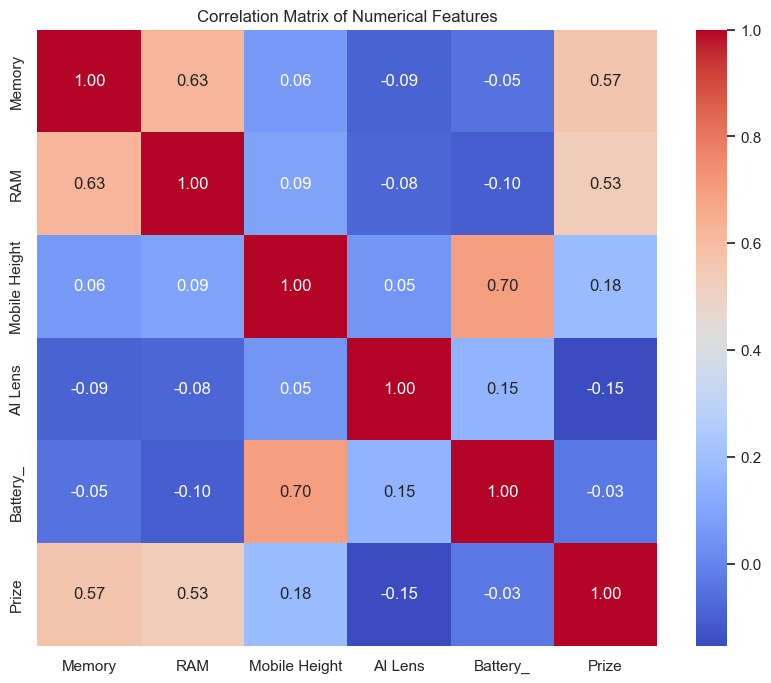

In [18]:
# Creating a correlation matrix

correlation_matrix = df[['Memory', 'RAM', 'Mobile Height','AI Lens', 'Battery_', 'Prize']].corr()

# Setting up the visualization style

sns.set(style='whitegrid')

# Plotting a heatmap for correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Observations :- The heatmap above represents the correlation matrix among the numerical features of the smartphones in the dataset. Here are some key observations.

1. Memory and Prize: There is a moderate positive correlation between the memory of smartphones and it's prize. This suggests that as the internal storage increases, the prize of the smartphone tends to increase as well.

2. RAM and Prize: Similar to memory, There is also a moderate positive correlation between the RAM and prize. This indicates that smartphones with higher RAM are generally more expensive.

3. Battery capacity and Prize: The correlation between Battery capacity and Prize is relatively low, implying that the prize of smartphones doesn't increase significantly with larger battery capacity.

4. Mobile height and other features: The mobile height shows very low correlation with other features like memory, RAM, battery capacity and prize, indicating that the physical size of the phone is not strongly related to these specifications.

5. Memory and RAM: There is a significant positive correlation between memory and RAM. This makes sense as higher-end models often come with both higher RAM and memory.

6. AI lens Vs Prize : The correlation is very low, indicating that the presence of an AI lens feature does not significantly affect the prize.

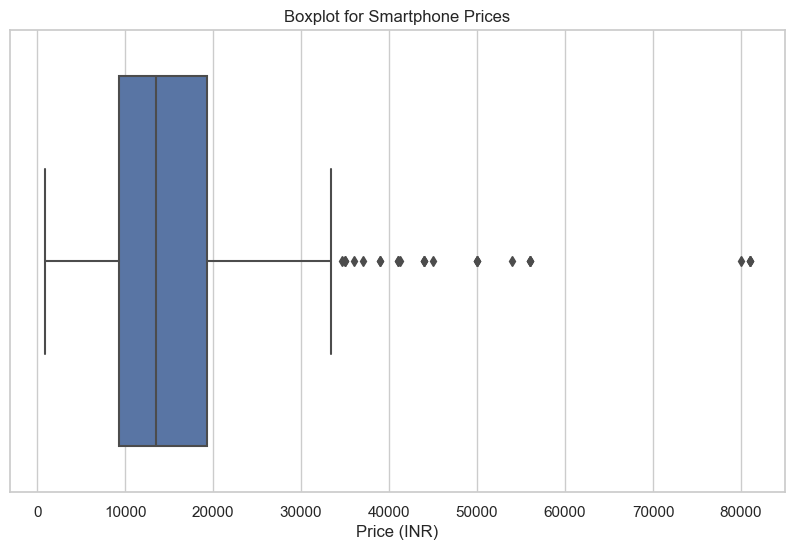

In [19]:
# Plotting a boxlplot for the 'Prize' column to check for outliers

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Prize'])
plt.title('Boxplot for Smartphone Prices')
plt.xlabel('Price (INR)')
plt.show()

Observations :- The boxplot for the 'Prize' column representing smartphone prices, shows the presence of outliers.

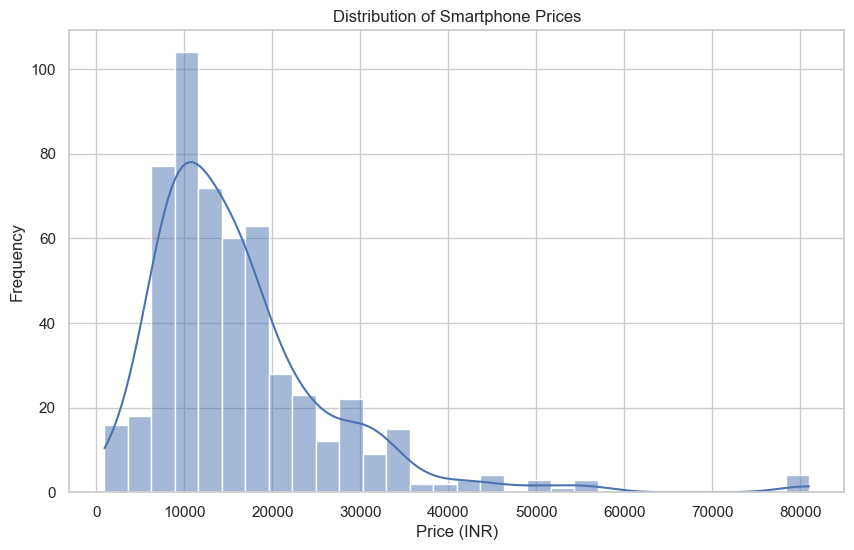

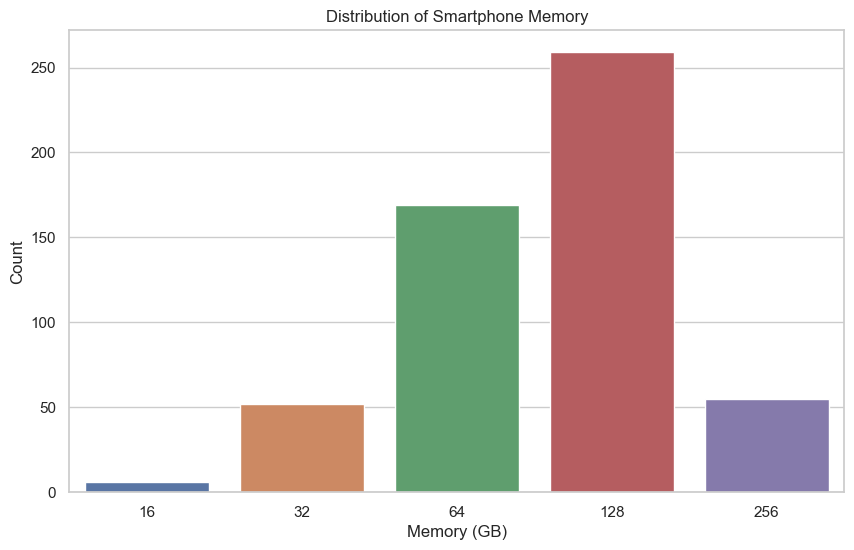

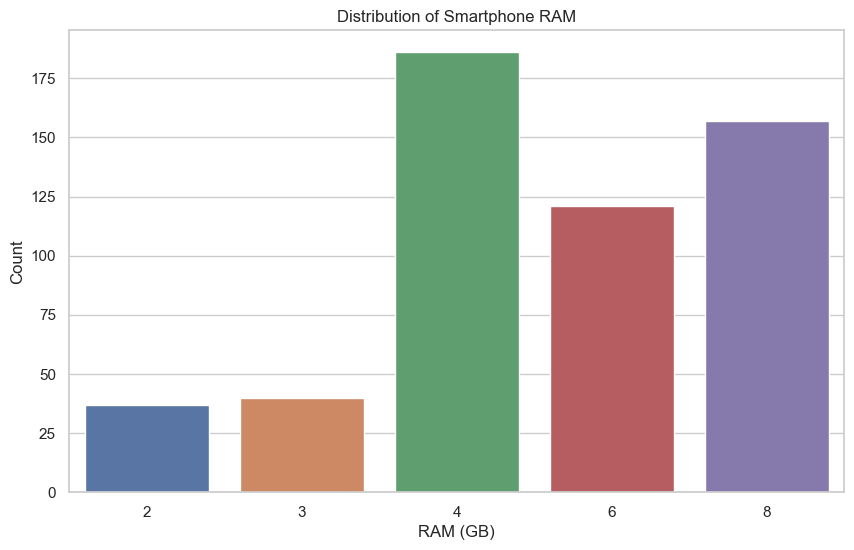

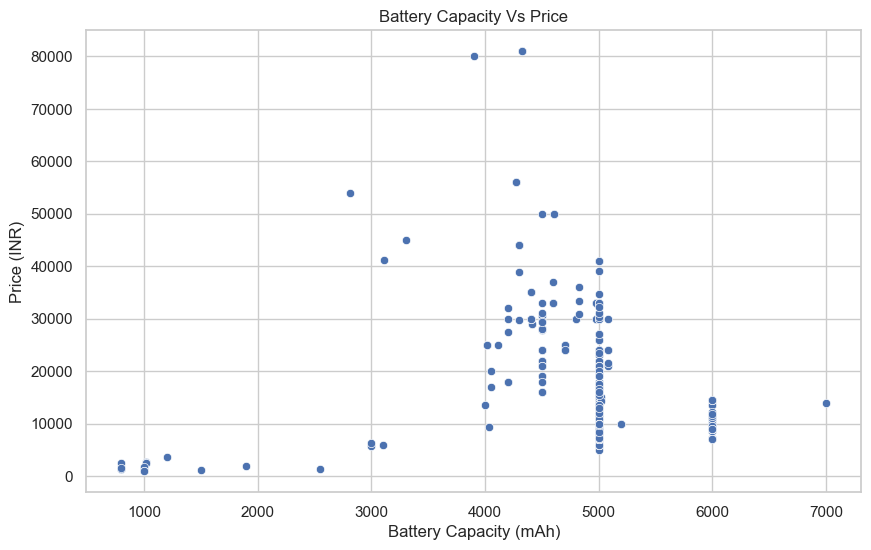

In [20]:
# Some more data exploration

# Visualizing the distribution of Prize

plt.figure(figsize=(10,6))
sns.histplot(df['Prize'], bins=30, kde=True)
plt.title("Distribution of Smartphone Prices")
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of Memory

plt.figure(figsize=(10,6))
sns.countplot(x='Memory', data=df)
plt.title('Distribution of Smartphone Memory')
plt.xlabel('Memory (GB)')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of RAM

plt.figure(figsize=(10,6))
sns.countplot(x='RAM', data=df)
plt.title('Distribution of Smartphone RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

# Battery Capacity Vs Price scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(x='Battery_', y='Prize', data=df)
plt.title('Battery Capacity Vs Price')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price (INR)')
plt.show()


Observations :- Here are some more data exploration based on visualization.

1. Distribution of Phone Prices : The price distribution shows a wide range of prices, with a concentration of smartphones in the lower to mid price range, there are fewer smartphones in the higher price range, indicating a skew towards more affordable models.

2. Distribution of Phone Memory : The most common memory sizes are 128 GB and 64 GB, with fewer smartphones offering 256 GB, 32 GB and 16 GB. This suggests a preference in the market for smartphones with moderate to high storage capacity.

3. Distribution of Phone RAM : The distribution of RAM shows a significant number of smartphones with 4 GB and 8 GB RAM, followed by 6 GB. Fewer models have 2GB and 3GB RAM.

4. Battery Capacity Vs Price : The Scatter plot of Battery Capacity Vs Price doesn't show a strong linear relationship. This suggests that battery capacity is not a primary factor driving the price of the smartphones. High capacity batteries are available in both lower and higher priced models.

### Data Preprocessing

In [21]:
# Drop unnecessary columns
# The "Unnamed: 0" column seems redundant as it just replicates the index
# We can consider dropping it for analysis

df2 = df.drop("Unnamed: 0", axis = 1)

In [22]:
df2

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [23]:
# Handling missing values

missing_values

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

Since there are no any missing values, will move further for Handling The Outliers

In [24]:
# Let's consider handling outliers in the 'Prize' column

q1 = df2['Prize'].quantile(0.25)
q3 = df2['Prize'].quantile(0.75)

iqr = q3 - q1

lower_fence = q1 - 1.5*iqr
higher_fence = q3 + 1.5*iqr

# Replacing outliers with median values

df2['Prize'] = df2['Prize'].apply(lambda x : df2['Prize'].median() if x < lower_fence or x > higher_fence else x)


In [25]:
df1 = df2.copy()

In [26]:
df1

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999.0
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,13499.0
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998.0
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990.0
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",13499.0


In [27]:
# Convert categorical variables into numerical format (One-Hot Encoding)

Categorical_cols = df1.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(df1, columns=Categorical_cols)

In [28]:
data_encoded

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,...,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616,Processor__ios,Processor__snapdragon 888
0,64,4,6000,1,16.76,7299.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,64,4,6000,1,16.76,7299.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,128,8,5000,0,16.64,11999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,2,5000,0,16.56,5649.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,8,5000,1,16.76,8999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,0,15.49,13499.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,32,2,3100,0,12.70,5998.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,64,4,5000,0,16.76,9990.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,128,8,5000,0,16.26,13499.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observations :- Since there are lots of features, that have been created using One Hot Encoding, that would be tedious to handle, Hence We will use Ordinal Encoding to Convert categorical variables into numerical format.


For this we have to import OrdinalEncoder first.

In [29]:
from sklearn.preprocessing import OrdinalEncoder

# Selecting the columns suitable for odinal encoding
categorical_columns = ['Colour', 'Rear Camera', 'Front Camera', 'Processor_']

# Initializing the ordinal encoder
encoder = OrdinalEncoder()

# Fitting and transforming the data
df1[categorical_columns] = encoder.fit_transform(df1[categorical_columns])

# Display the first few rows of the updated datset
df1.head()


,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,159.0,64,4,6000,3.0,10.0,1,16.76,113.0,7299.0
1,Infinix SMART 7,20.0,64,4,6000,3.0,10.0,1,16.76,113.0,7299.0
2,MOTOROLA G32,149.0,128,8,5000,10.0,4.0,0,16.64,75.0,11999.0
3,POCO C50,201.0,32,2,5000,13.0,10.0,0,16.56,56.0,5649.0
4,Infinix HOT 30i,130.0,128,8,5000,10.0,10.0,1,16.76,14.0,8999.0


The Ordinal Encoding has been applied to the suitable columns. Each unique category in these columns has been assigned a unique integer.

The model column contains the names of the model, which are typically treated as nominal data. However we can apply ordinal encoding to this 'Model' column just as we did with the other columns to convert it into the numerical format for easier handling.

In [30]:
# Applying ordinal encoding to the 'Model' column

df1['Model'] = encoder.fit_transform(df1[['Model']])

df1

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23.0,159.0,64,4,6000,3.0,10.0,1,16.76,113.0,7299.0
1,23.0,20.0,64,4,6000,3.0,10.0,1,16.76,113.0,7299.0
2,37.0,149.0,128,8,5000,10.0,4.0,0,16.64,75.0,11999.0
3,69.0,201.0,32,2,5000,13.0,10.0,0,16.56,56.0,5649.0
4,12.0,130.0,128,8,5000,10.0,10.0,1,16.76,14.0,8999.0
...,...,...,...,...,...,...,...,...,...,...,...
536,118.0,49.0,256,8,3900,10.0,2.0,0,15.49,89.0,13499.0
537,32.0,52.0,32,2,3100,11.0,6.0,0,12.70,68.0,5998.0
538,123.0,259.0,64,4,5000,10.0,12.0,0,16.76,35.0,9990.0
539,110.0,17.0,128,8,5000,10.0,7.0,0,16.26,11.0,13499.0


The 'Model' column has now been encoded ordinally, assigning a unique integer to each unique model name.


#### Using the LabelCoder

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for the categorical variables
label_encoders = {col:LabelEncoder() for col in ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']}

# Apply label encoding to each categorical column
for col, encoder in label_encoders.items():
    df2[col] = encoder.fit_transform(df2[col])


In [32]:
df2

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,7299.0
1,23,20,64,4,6000,3,10,1,16.76,113,7299.0
2,37,149,128,8,5000,10,4,0,16.64,75,11999.0
3,69,201,32,2,5000,13,10,0,16.56,56,5649.0
4,12,130,128,8,5000,10,10,1,16.76,14,8999.0
...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,10,2,0,15.49,89,13499.0
537,32,52,32,2,3100,11,6,0,12.70,68,5998.0
538,123,259,64,4,5000,10,12,0,16.76,35,9990.0
539,110,17,128,8,5000,10,7,0,16.26,11,13499.0


Observations :- As we can see, using both the encoders we are getting the same result.

### Feature Extraction

In [33]:
# Calculating the correlation of each feature with the price

price_correlations = df2.corr()['Prize'].sort_values(ascending=False)

price_correlations

Prize            1.000000
Memory           0.663495
RAM              0.643985
Mobile Height    0.270744
Battery_         0.130612
Model            0.124920
Rear Camera      0.062399
Colour           0.058503
Processor_      -0.094905
AI Lens         -0.171401
Front Camera    -0.372234
Name: Prize, dtype: float64

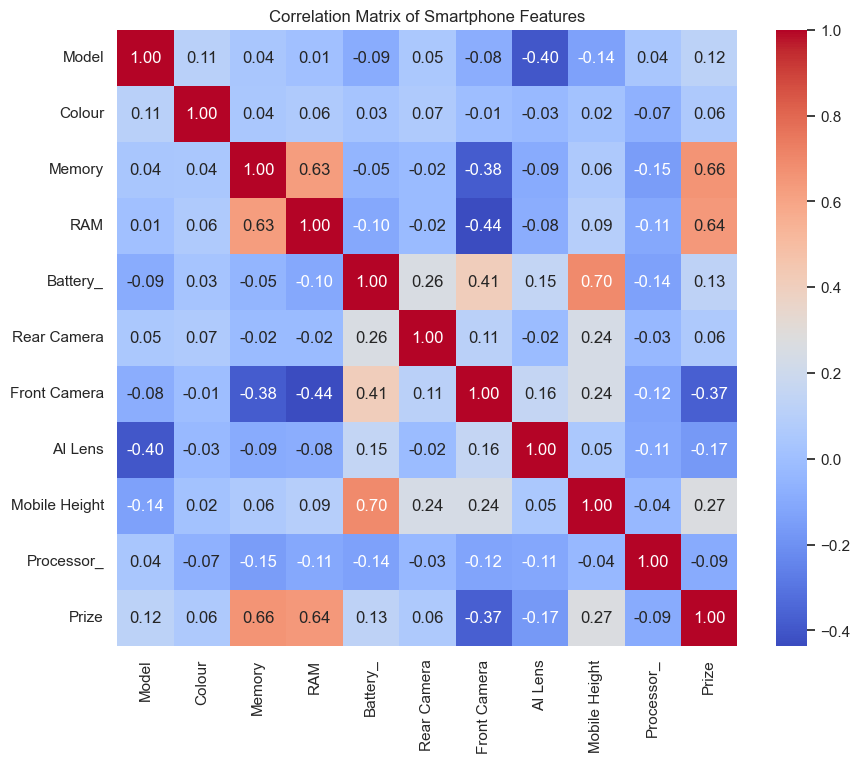

In [34]:
# Creating a correlation matrix

correlation_matrix = df2.corr()

# Setting up the visualization style

sns.set(style='whitegrid')

# Plotting a heatmap for correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Smartphone Features")
plt.show()

Features 'Memory' and 'RAM' have a more noticeable positive correlation with the price.

#### Principal Component Analysis (PCA)

In [35]:
from sklearn.decomposition import PCA

# Standardization of the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

# Applying PCA
pca = PCA(n_components=2)  # Using 2 components for visualization purposes
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

pca_df.head()

,Principal Component 1,Principal Component 2
0,-2.596461,-0.763273
1,-2.702775,-0.666949
2,0.867109,-0.145954
3,-2.444489,-0.155270
4,-0.707592,-1.539119


Observations :- After standardizing the data, We applied Principal Component Analysis (PCA) and reduced the dataset to two principal components. These components are linear combinations of our original features and are designed to capture as much of the variance in the data as possible.

#### Visualizing these components and Exploring the explained variance ratio

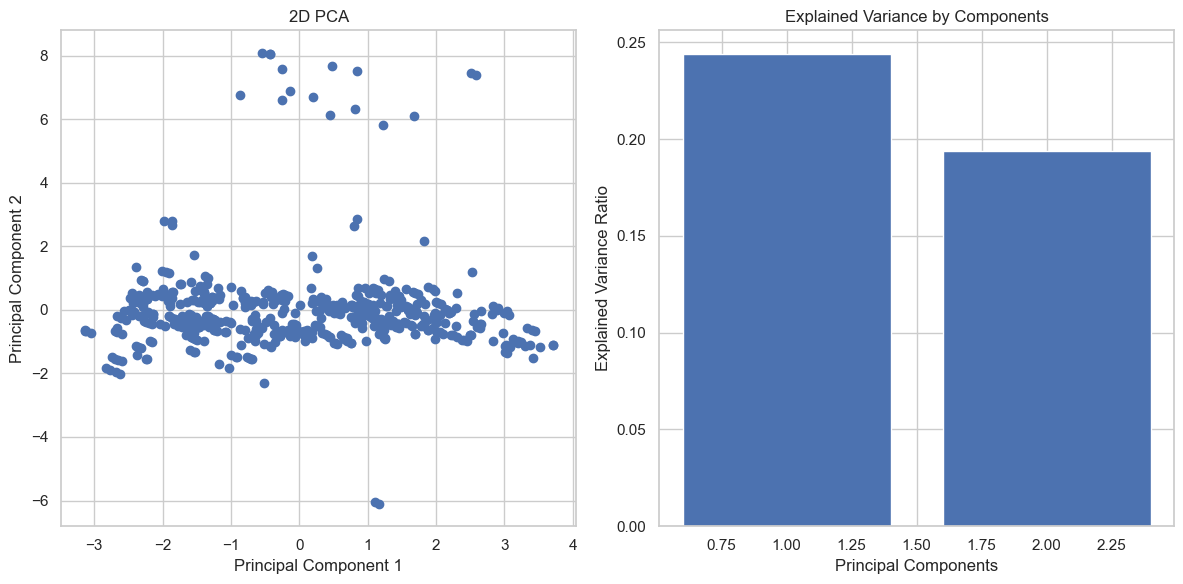

array([0.24404021, 0.19377276])

In [36]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the principal components
plt.figure(figsize=(12, 6))

# Scatter plot of the principal components
plt.subplot(1, 2, 1)
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Bar plot of the explained variance
plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance by Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()

explained_variance


Here's what the Visualizations and Explained variance ratio tell us:

2D PCA Scatter plot :  This gives a visual representation of where each data point lies in the space spanned by the two main components.

Explained variance ratio :  It Shows the proportion of the variance explained by each of the two principal components. The first component explains approx 24% of the variance, while the second one accounts for about 19%. Together, they capture around 43% of the total variance in the dataset.
The fact that only 43% of the variance is explained suggests that there are more complexities in the dataset that might require more components for a comprehensive understanding.

### Model Building

In [37]:
# Import necessary packages

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Splitting the dataset into features (X) and the target variable (y)

X = pca_df
y = df2['Prize']

# Splitting into training and testing sets

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model

linear_model = LinearRegression()

# Train the model

linear_model.fit(X_train, y_train)

# Predict on the test set

y_pred = linear_model.predict(x_test)

# Calculate performance metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
mse, r2

(9332730.611560669, 0.8034560362164304)

The linear regression model is trained and evaluated on the test set, The performance metrices are as :-

1. Mean Squared Error (MSE) : Approximately 9332730.62

2. R2 score :  Approximately 0.81


MSE :- This value indicates the average squared difference between the actual and the predicted value.

R2 :- This score represents the proportion of variance in the dependent variable that is predicatable from the independent variable. Here, an R2 of 0.81 means that about 81% of the variance in the 'Prize' can be predicted from the PCA components. This is a relatively strong score, suggesting that the model has good predicting power.

### Model Evaluation

In [39]:
# Evaluating the performance metrics

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mae, rmse


(2111.5288275216917, 3054.9518182060856)

Observations :- 

MAE : On average, the model's predictions are about 2111.53 units, away from the actual phone price.

EMSE : This is a more sensitive measure to larger errors, an RSME of 3054.95 suggests that the standard deviation of the prediction error is around this value.

#### Using Random Forest

In [40]:
# Import necessary packages first

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Creating a pipeline that first scales the features and then apply Random Forest

pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# Training the pipeline on the training data

pipeline.fit(X_train, y_train)

# Predicting on the test set

y_pred_rf = pipeline.predict(x_test)

# Calculate performance metrics for Random Forest

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Perform cross-validation

cv_scores = cross_val_score(pipeline, X, y, cv=5)


In [41]:
mse_rf, rmse_rf, r2_rf, cv_scores.mean()

(6635072.091646789, 2575.8633682023565, 0.8602677583700313, 0.7388290555473904)

Observations :- Comparing these metrics to those from the Linear Regression Model, We notice improvements.

#### Using Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree

dt_predictions = dt_model.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [43]:
dt_mse, dt_r2

(6785182.660550458, 0.8571064835571071)

#### Using Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaliation for Gradient Boosting

gb_predictions = gb_model.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [45]:
gb_mse, gb_r2

(6719899.303974668, 0.8584813276627119)

### Feature Importance Analysis

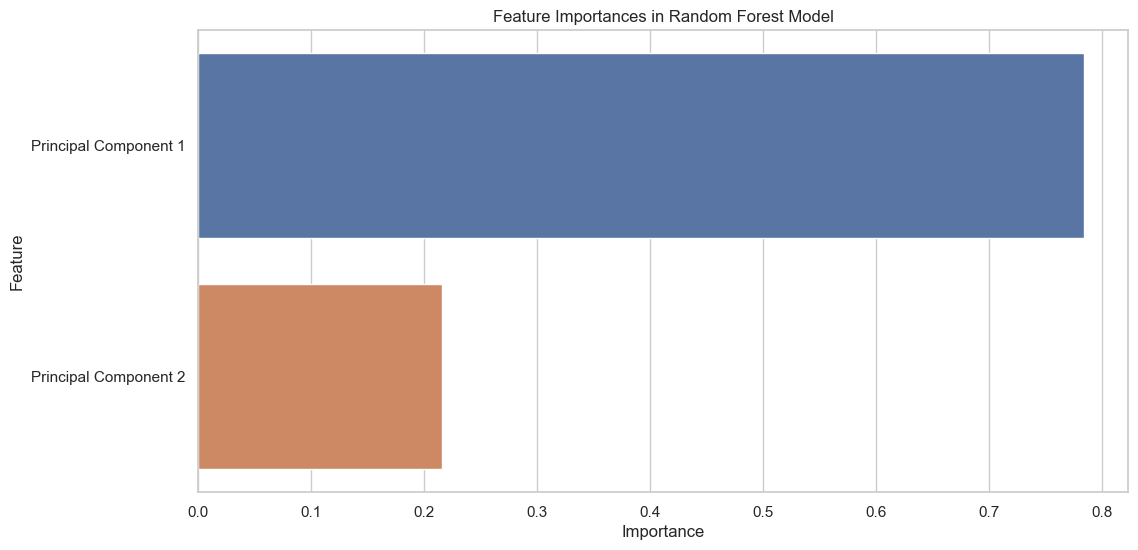

,Feature,Importance
0,Principal Component 1,0.783945
1,Principal Component 2,0.216055


In [46]:
# Extracting feature importance from the Random Forest model

feature_importances = pipeline.named_steps['randomforestregressor'].feature_importances_

# Creating a DataFrame for better visualization

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y="Feature", data=features_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

features_df

Observations :-

PC1(Principal Component1) : This component is the most important feature, with an importance score of approximately 0.784. It indicates that the first principal component captures the most significant variance and patterns in the data.

PC2(Principal Component2) : The second principal component is also valuable but less so than the first, with an importance score of about 0.216.

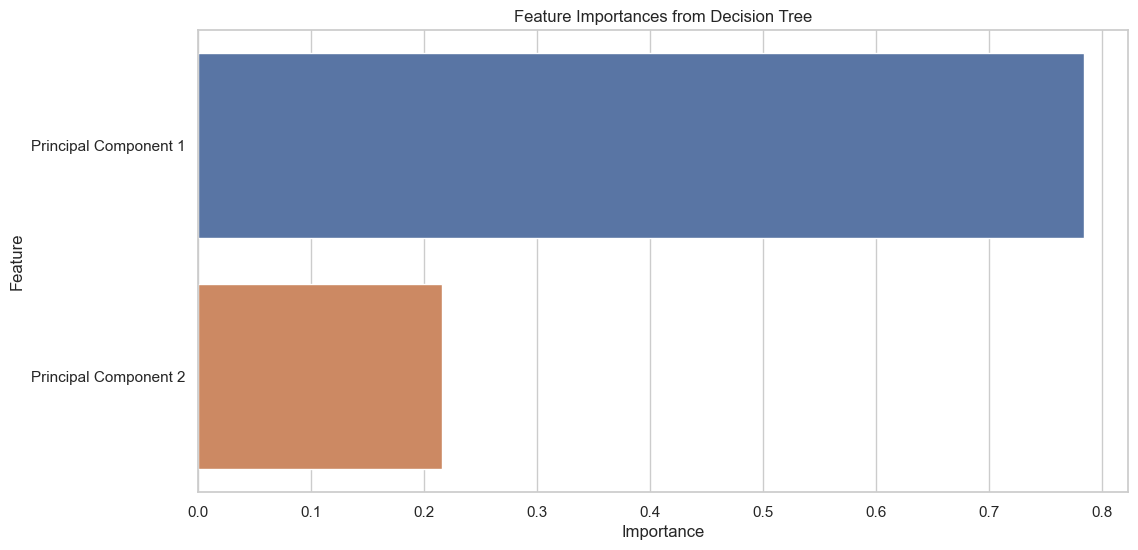

,Feature,Importance
0,Principal Component 1,0.779842
1,Principal Component 2,0.220158


In [47]:
# Feature importance from the Decision Tree

dt_feature_importance = dt_model.feature_importances_

# Creating a DataFrame for better visualization

dt_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_feature_importance
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y="Feature", data=features_df)
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

dt_features_df

Observations :-

PC1(Principal Component1) : This component is the most important feature, with an importance score of approximately 0.7799. It indicates that the first principal component captures the most significant variance and patterns in the data.

PC2(Principal Component2) : The second principal component is also valuable but less so than the first, with an importance score of about 0.2201.

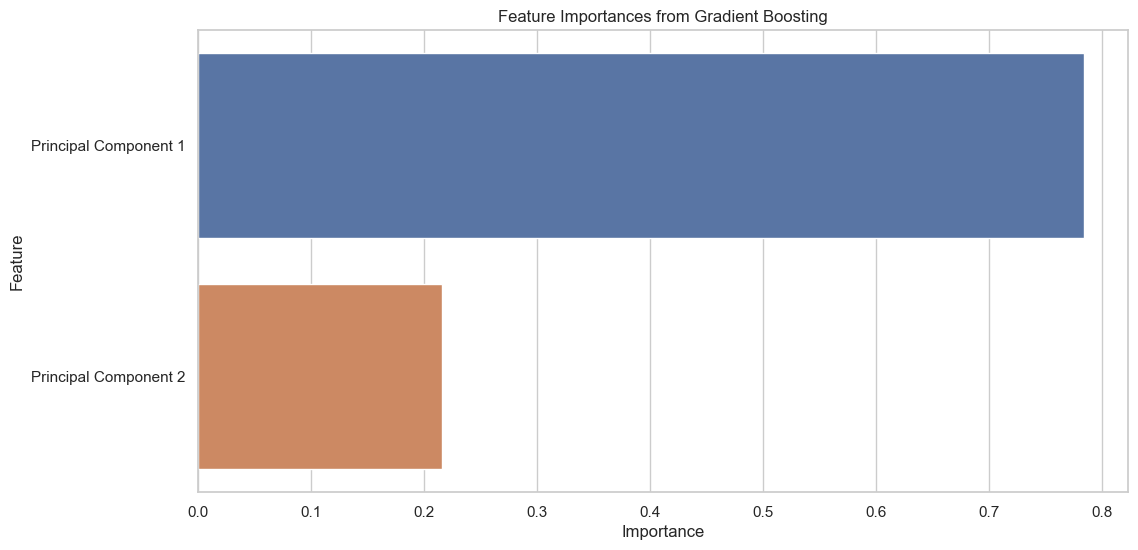

,Feature,Importance
0,Principal Component 1,0.805455
1,Principal Component 2,0.194545


In [48]:
# Feature importance from the Gradient boosting

gb_feature_importance = gb_model.feature_importances_

# Creating a DataFrame for better visualization

gb_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_feature_importance
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y="Feature", data=features_df)
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

gb_features_df

Observations :-

PC1(Principal Component1) : This component is the most important feature, with an importance score of approximately 0.806. It indicates that the first principal component captures the most significant variance and patterns in the data.

PC2(Principal Component2) : The second principal component is also valuable but less so than the first, with an importance score of about 0.195.

In [49]:
# Re-appliying PCA to the standardized data with 5 components

pca_full = PCA(n_components = 5)
pca_full.fit(scaled_data)

# Extracting the PCA components (loadings)

loadings = pca_full.components_.T

# Creating a Dataframe with the loadings for each original feature

loadings_df = pd.DataFrame(loadings, columns = [f'PC{i+1}' for i in range(5)])

loadings_df

,PC1,PC2,PC3,PC4,PC5
0,0.121059,0.147929,-0.636837,-0.138488,-0.256972
1,0.060314,-0.054646,-0.218296,-0.636439,0.653908
2,0.501892,-0.114555,0.132094,-0.040939,-0.069381
3,0.507389,-0.095598,0.155112,-0.004281,0.049637
4,-0.130212,-0.586656,-0.106364,0.082766,-0.067361
5,-0.033373,-0.291794,-0.304985,0.001830,0.285388
6,-0.408519,-0.260618,-0.089454,-0.147947,-0.224936
7,-0.179400,-0.152655,0.592873,-0.132784,0.237085
8,-0.002230,-0.581160,-0.092615,0.244390,0.041218
9,-0.051968,0.194322,-0.177571,0.679368,0.550667


In [50]:
df2

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,7299.0
1,23,20,64,4,6000,3,10,1,16.76,113,7299.0
2,37,149,128,8,5000,10,4,0,16.64,75,11999.0
3,69,201,32,2,5000,13,10,0,16.56,56,5649.0
4,12,130,128,8,5000,10,10,1,16.76,14,8999.0
...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,10,2,0,15.49,89,13499.0
537,32,52,32,2,3100,11,6,0,12.70,68,5998.0
538,123,259,64,4,5000,10,12,0,16.76,35,9990.0
539,110,17,128,8,5000,10,7,0,16.26,11,13499.0


#### Conclusion :-

The model's reliance on PC1 more than PC2 aligns with the nature of PCA, where the first few components are designed to capture the most variance.
Both the components are used (with significant weights) indicates that the feature extraction phase was successful in identifying meaningful patterns in the data.
The dominance of PC1 suggests that most information relevant for predicting the mobile phone prices is encapsulated in this single component. However, with an average importance of approximately 0.21 (21 %), PC2 also plays a significant role in predictions.  

Memory Size (RAM and Storage) :  High positive loading in PC1. It means that Phone with more Memory and Storage tends to be priced higher and are important for performance-focused consumers.